## 1 환경설정

In [143]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
import folium
import folium.plugins
import requests
import json
import folium.plugins
from IPython.display import Image
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (12,8)  #시각화 figure default 설정
mpl.rcParams['font.family'] = 'NanumGothic' #폰트 디폴트 설정
mpl.rcParams['font.size'] = 10    #폰트 사이즈 디폴트 설정
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷
pd.options.display.float_format = '{:.3f}'.format # 넘파이 과학적 표기 제거

In [2]:
# 부산 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/raqoon886/Local_HangJeongDong/master/hangjeongdong_%EB%B6%80%EC%82%B0%EA%B4%91%EC%97%AD%EC%8B%9C.geojson')
c = r.content
busan_geo = json.loads(c)

## 2 데이터 분석

### 2.1 부산광역시_지역구별_업종별_소비

In [9]:
import os

path = "./"
file_list = os.listdir(path)
csv_list = [file for file in file_list if file.endswith(".csv")]
csv_list

['강서구_업종별_소비.csv',
 '금정구_업종별_소비.csv',
 '기장군_업종별_소비.csv',
 '남구_업종별_소비.csv',
 '동구_업종별_소비.csv',
 '동래구_업종별_소비.csv',
 '부산진구_업종별_소비.csv',
 '북구_업종별_소비.csv',
 '사상구_업종별_소비.csv',
 '사하구_업종별_소비.csv',
 '서구_업종별_소비.csv',
 '수영구_업종별_소비.csv',
 '연제구_업종별_소비.csv',
 '영도구_업종별_소비.csv',
 '중구_업종별_소비.csv',
 '해운대구_업종별_소비.csv']

In [16]:
gu_list = [csv.split("_")[0] for csv in csv_list]

In [19]:
df_gu = pd.DataFrame()

for gu, csv in zip(gu_list, csv_list):
    df = pd.read_csv(csv, encoding = "cp949")
    df["지역구"] = gu
    df_gu = df_gu.append(df)
    
df_gu

대분류     중분류  대분류 지출액  대분류 지출액 비율  중분류 지출액  중분류 지출액 비율   지역구
0   여가서비스업     골프장  6829341           4  5439373          80   강서구
1      쇼핑업   관광기념품 39264712          22    11973           0   강서구
2   여가서비스업  관광유원시설  6829341           4    40997           1   강서구
3   여가서비스업    기타레저  6829341           4   736423          11   강서구
4      숙박업    기타숙박  2453944           1  2452058         100   강서구
..     ...     ...      ...         ...      ...         ...   ...
12     여행업     여행업   106961           0   106961         100  해운대구
13     운송업    육상운송  2542213           0      547           0  해운대구
14     숙박업  캠핑장/펜션 58896679           9    12386           0  해운대구
15     숙박업      콘도 58896679           9  2593067           4  해운대구
16     숙박업      호텔 58896679           9 39661413          67  해운대구

[224 rows x 7 columns]

In [115]:
df_gu.to_csv("부산광역시_지역구별_대분류중분류_지출액.csv", index = False)

In [26]:
df_category = pd.DataFrame(df_gu.groupby(["대분류"])["대분류 지출액"].sum())

In [27]:
df_subcategory = pd.DataFrame(df_gu.groupby(["대분류", "중분류"])["중분류 지출액"].sum())

In [28]:
df_category

대분류 지출액
대분류              
쇼핑업    4517477214
숙박업     464258351
식음료업   1417281899
여가서비스업  478652488
여행업       1484189
운송업     153697065

<AxesSubplot:xlabel='대분류,중분류'>

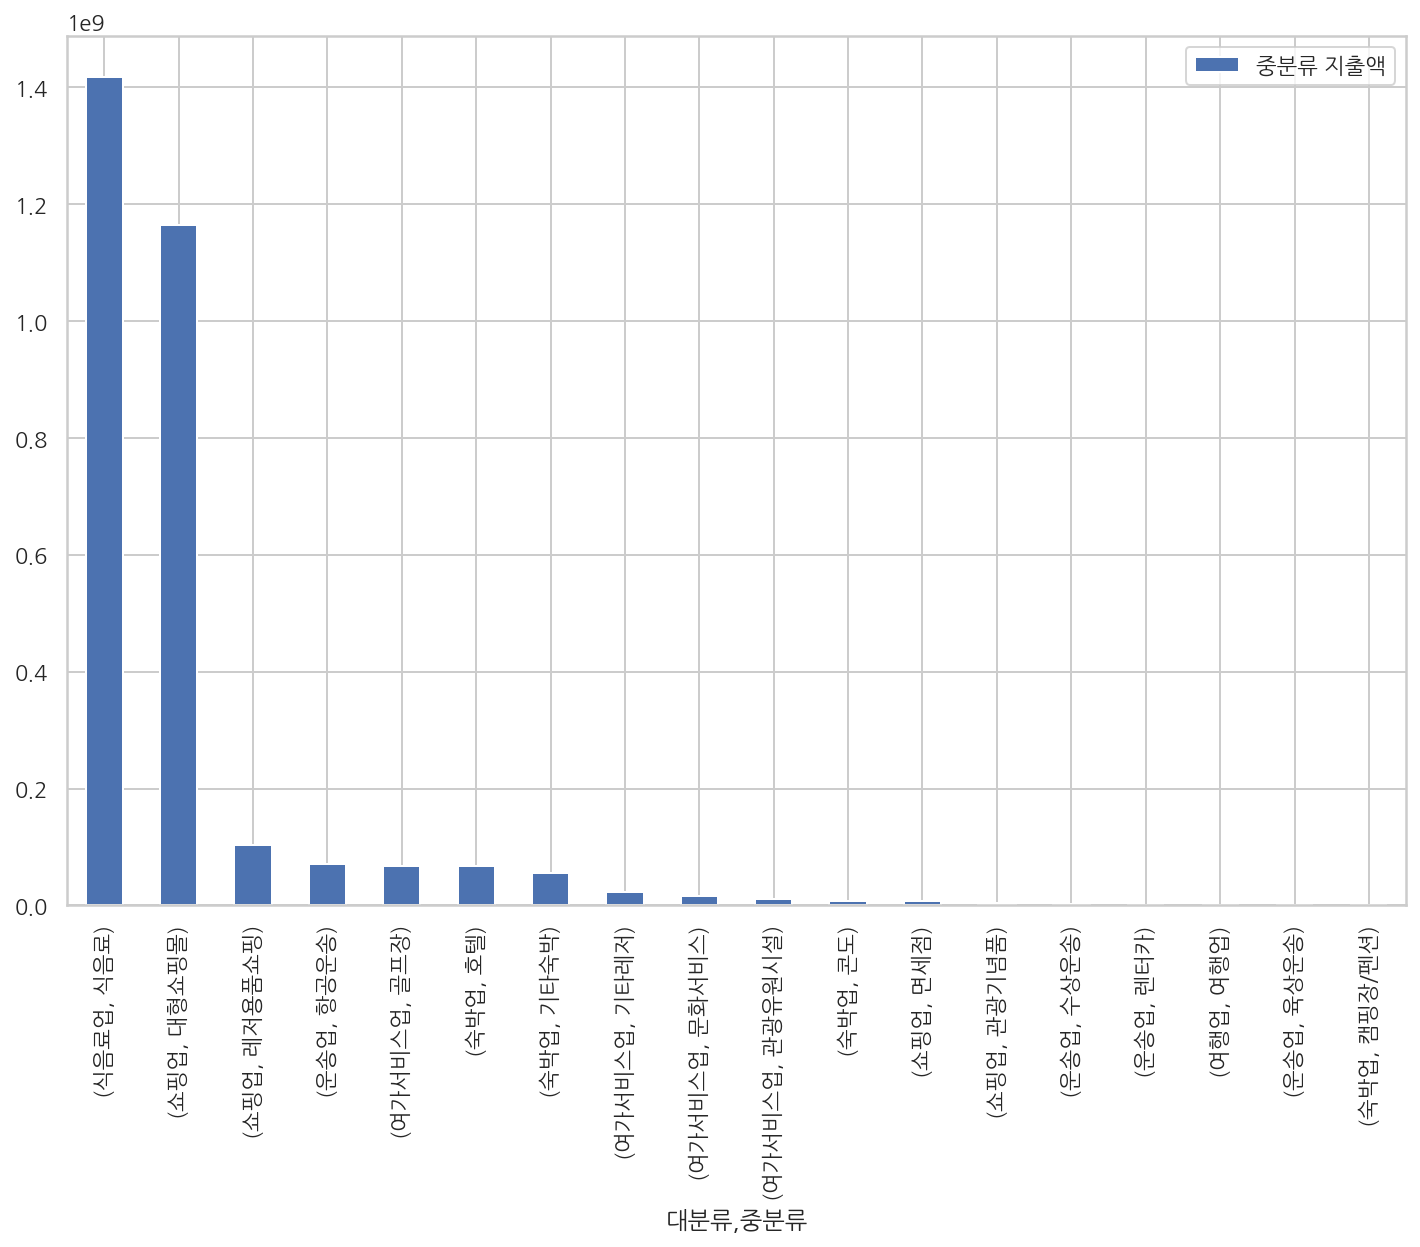

In [139]:
df_subcategory.sort_values(by = "중분류 지출액", ascending = False).plot.bar()

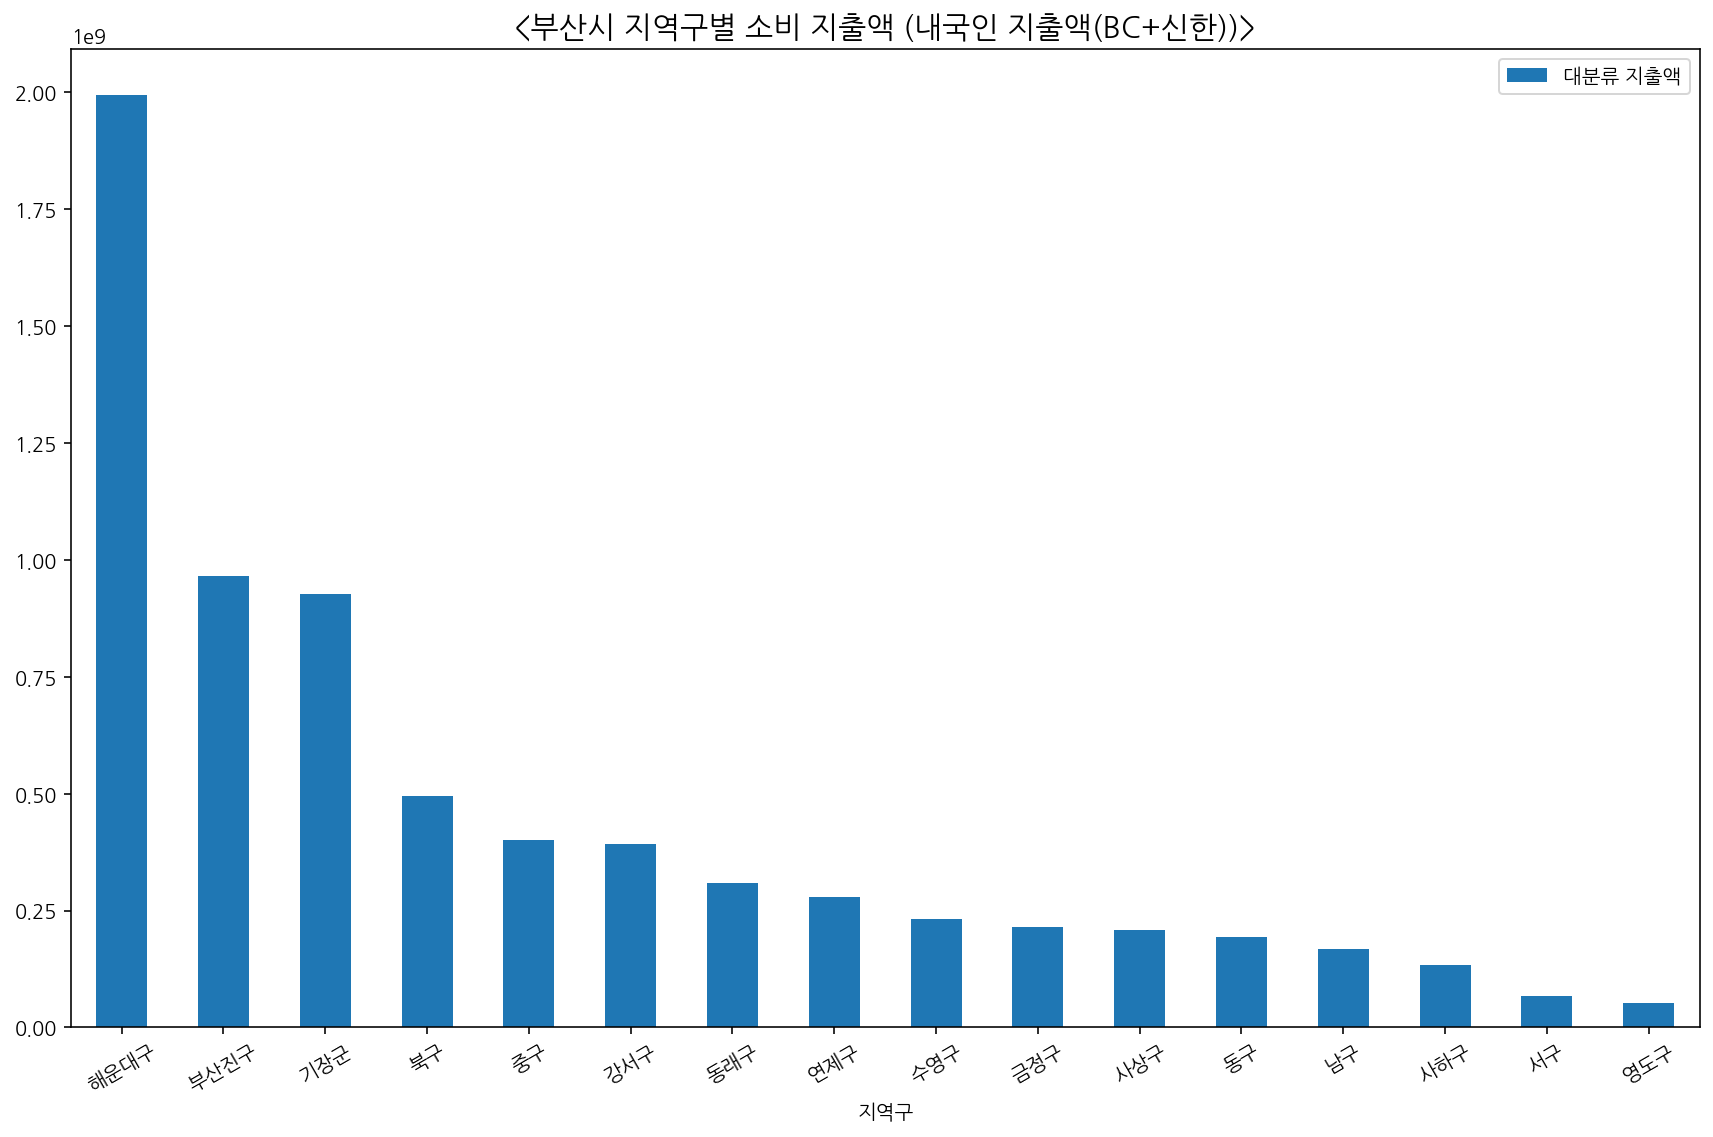

In [49]:
pd.DataFrame(df_gu.groupby(["지역구"])["대분류 지출액"].sum()).sort_values(by = "대분류 지출액", ascending = False).plot.bar(rot = 30)
plt.title("<부산시 지역구별 소비 지출액 (내국인 지출액(BC+신한))>", fontsize = 15)
plt.tight_layout()
plt.savefig("부산시 지역구별 소비 지출액", dpi = 1000)
plt.show()

In [123]:
df_gu_ct = pd.crosstab(index = df_gu["지역구"], 
                       columns = df_gu["중분류"],
                       values = df_gu["중분류 지출액"], 
                       aggfunc = "sum")

In [141]:
df_gu.groupby("지역구")["중분류 지출액"].sum()

지역구
강서구    180859689
금정구    116058905
기장군    370923358
남구      96229414
동구      94883696
동래구    172124359
부산진구   400177395
북구     196859964
사상구    112087464
사하구     80440952
서구      46517420
수영구    160724027
연제구    146718272
영도구     36067436
중구     173680036
해운대구   638052088
Name: 중분류 지출액, dtype: float64

In [140]:
df_gu_ct.sum(axis = 1)

지역구
강서구    180859689
금정구    116058905
기장군    370923358
남구      96229414
동구      94883696
동래구    172124359
부산진구   400177395
북구     196859964
사상구    112087464
사하구     80440952
서구      46517420
수영구    160724027
연제구    146718272
영도구     36067436
중구     173680036
해운대구   638052088
dtype: float64

In [151]:
df_gu_ct = df_gu_ct.div(df_gu_ct.sum(axis = 1), axis =0)
df_gu_ct = df_gu_ct * 100

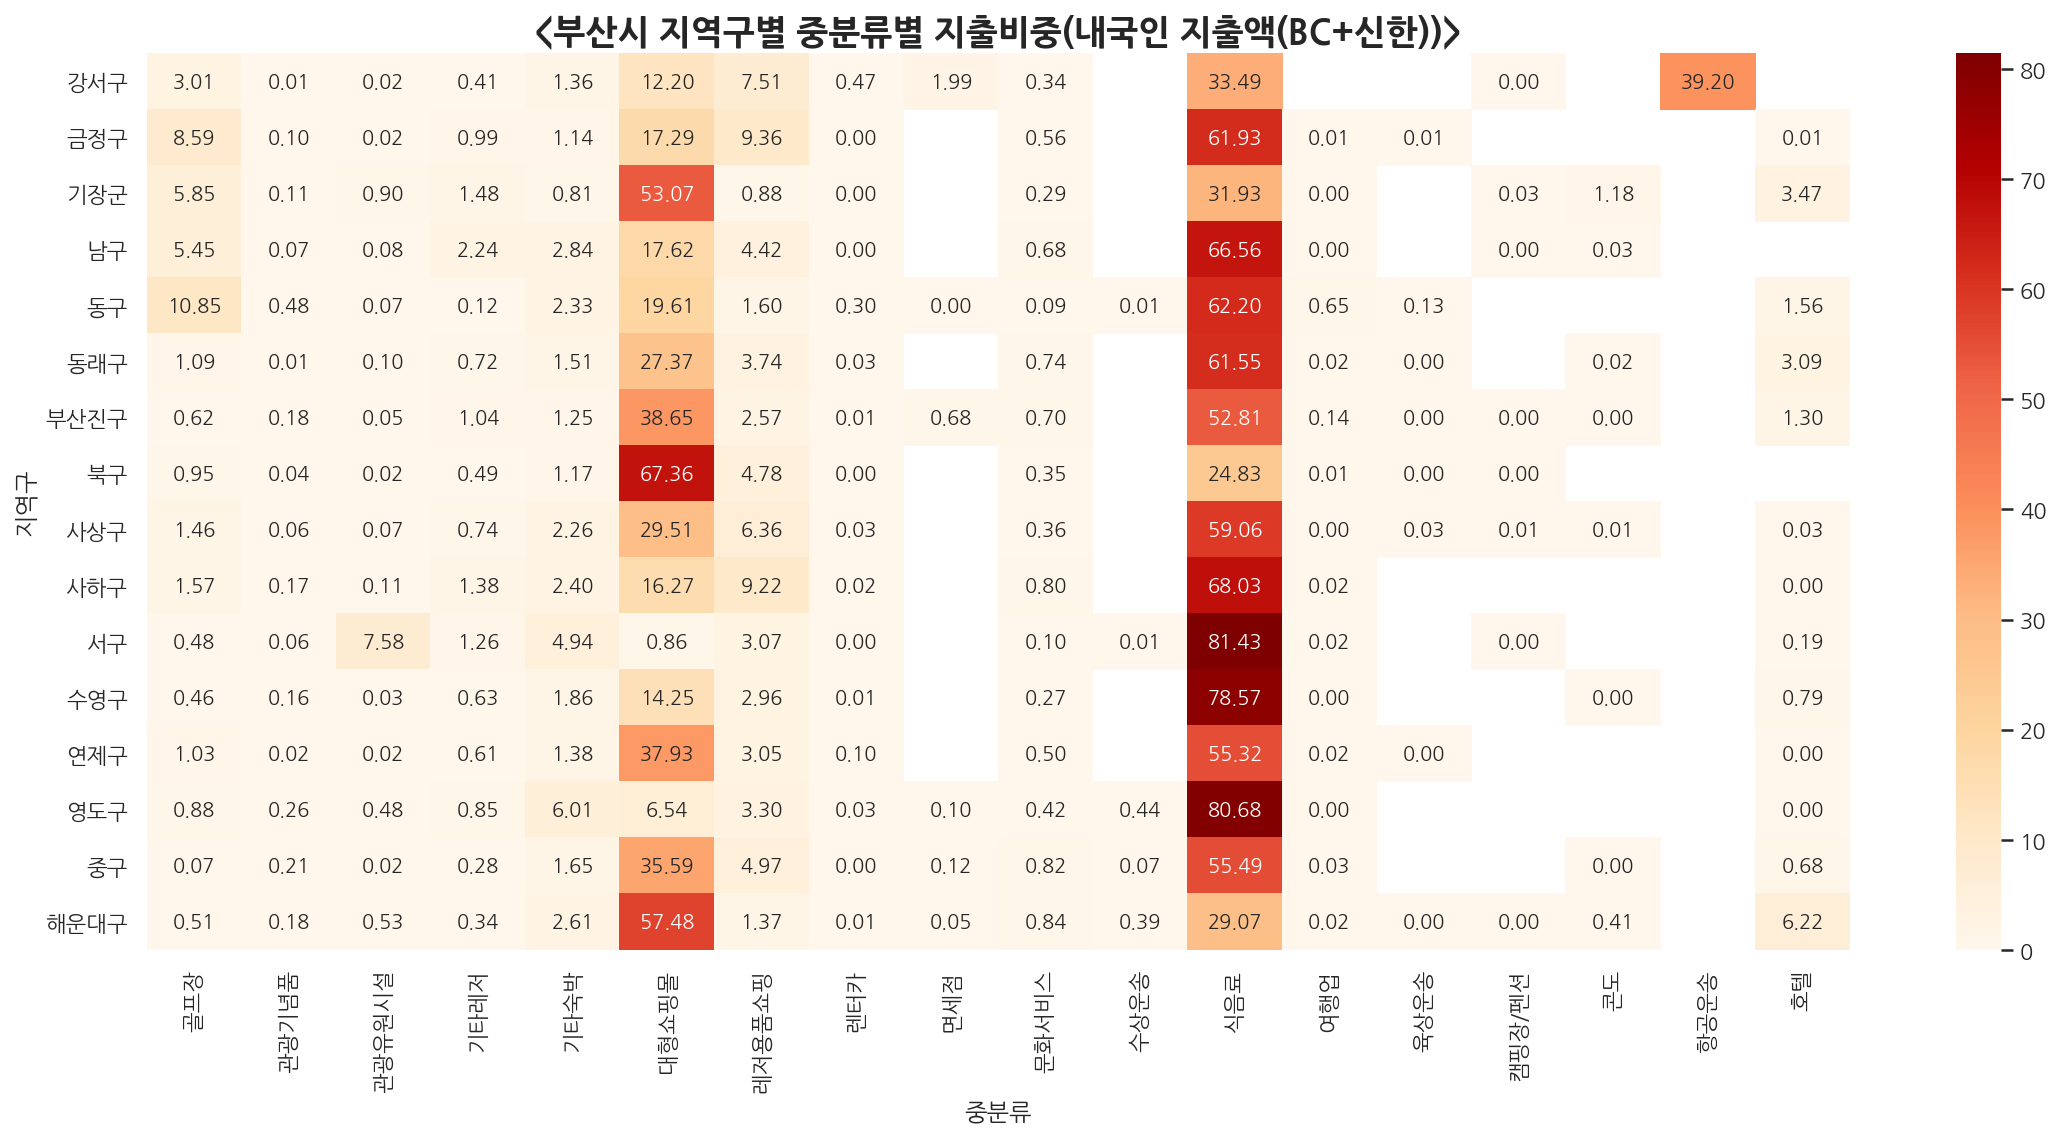

In [157]:
plt.figure(figsize =(16, 8))
sns.heatmap(df_gu_ct,  
            annot = True,
            fmt = ".2f",
            cmap = "OrRd")
plt.title("<부산시 지역구별 중분류별 지출비중(%)>", fontsize = 17, fontweight = "bold")
plt.tight_layout()
plt.savefig("부산시 지역구별 중분류별 지출비중(%)", dpi = 500)
plt.show()

---

In [83]:
df_subcategory_gu = df_gu.groupby(["지역구", "중분류"])["중분류 지출액"].sum().reset_index()
df_subcategory_gu = df_subcategory_gu[df_subcategory_gu["중분류"] == "대형쇼핑몰"]

In [84]:
df_category_gu = df_gu.groupby("지역구")['대분류 지출액'].sum().reset_index().sort_values(by = "대분류 지출액", ascending = False)
df_category_gu

지역구    대분류 지출액
15  해운대구 1992987423
6   부산진구  964878868
2    기장군  927827815
7     북구  493989820
14    중구  401164770
0    강서구  393345910
5    동래구  308912855
12   연제구  278759750
11   수영구  231823514
1    금정구  214862507
8    사상구  209333878
4     동구  192826826
3     남구  168696129
9    사하구  132990385
10    서구   68158050
13   영도구   52292706

In [85]:
x_list = list(df_category_gu["지역구"].values)

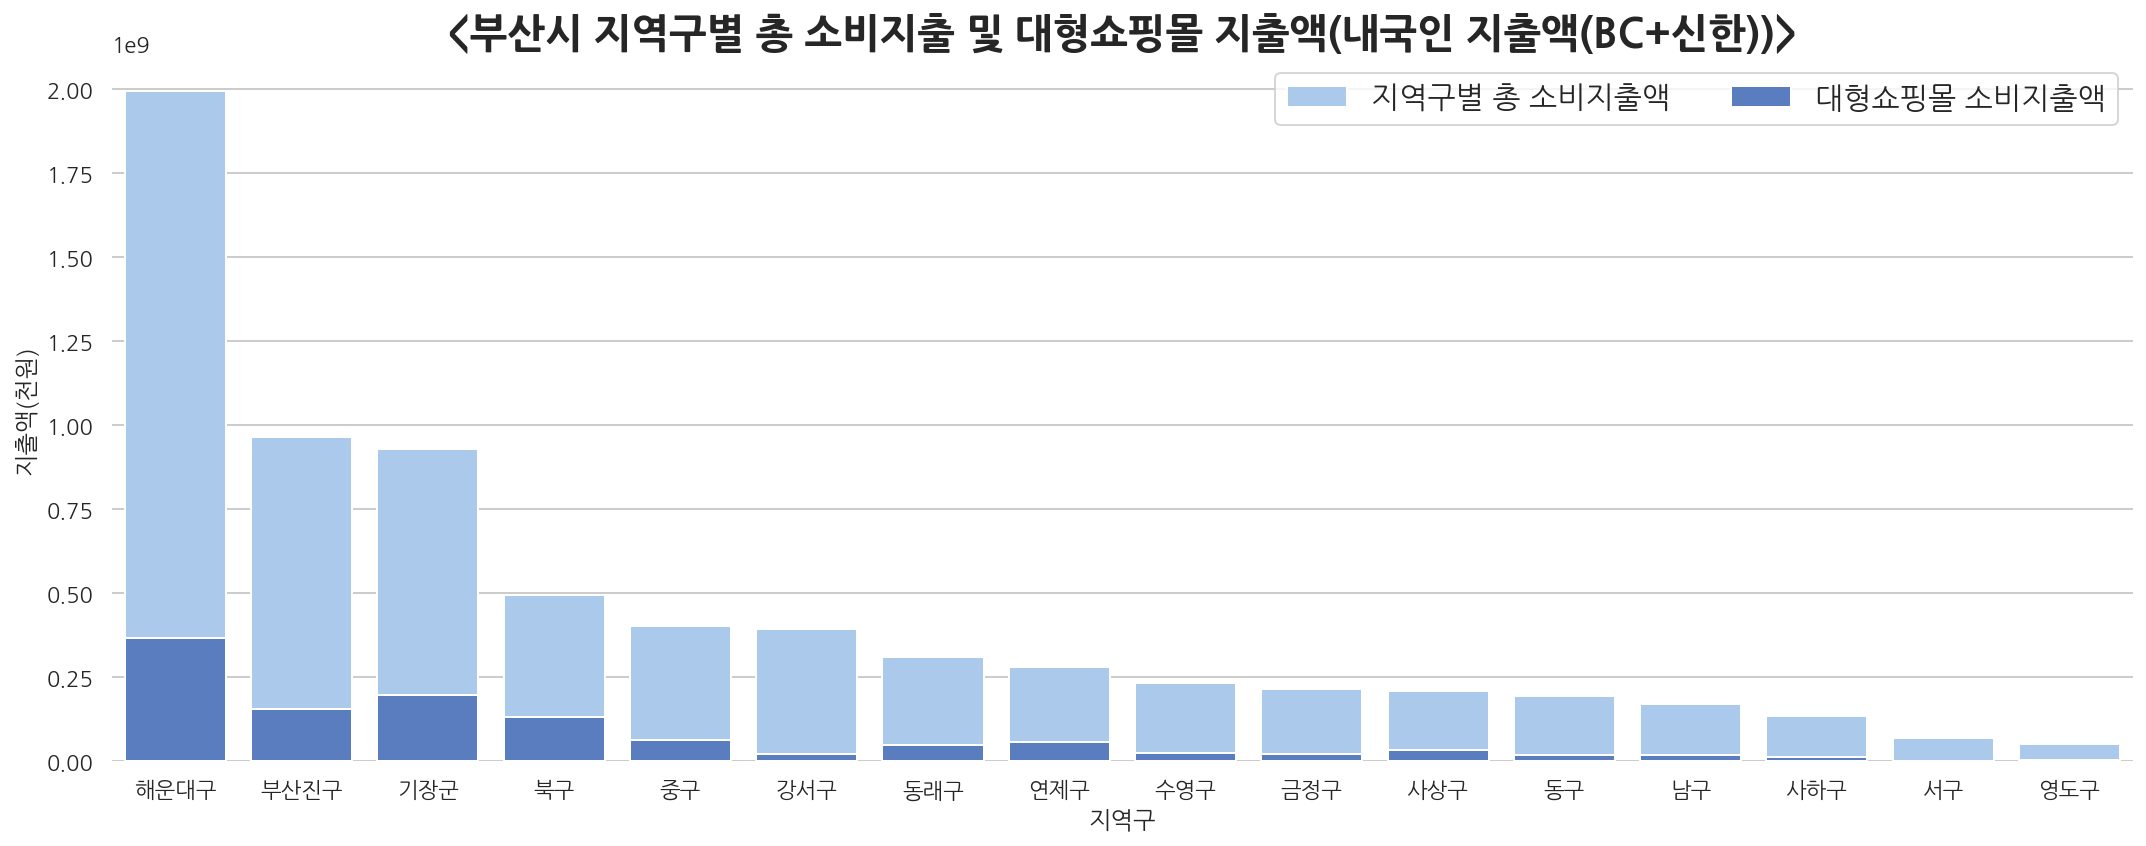

In [114]:
# sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="지역구", y="대분류 지출액", data=df_category_gu,
            label="지역구별 총 소비지출액", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="지역구", y="중분류 지출액", data=df_subcategory_gu,
            label="대형쇼핑몰 소비지출액", color="b", order = x_list)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True, fontsize = 15)
ax.set(ylabel="지출액(천원)",
       xlabel="지역구")

sns.despine(left=True, bottom=True)

plt.title("<부산시 지역구별 총 소비지출 및 대형쇼핑몰 지출액(내국인 지출액(BC+신한))>", fontsize = 20, fontweight = "bold")
plt.tight_layout()
plt.savefig("부산시 지역구별 총 소비지출 및 대형쇼핑몰 지출액", dpi = 800)
plt.show()